## DS2000 & DS2001 Programming with Data & Practicum

# Project 2: Cardiovascular Disease: Causes, Treatment, and Prevention

## Parts 1 and 2: Due Friday, March 22, 10:00 PM

### 42 Points

In this project, you will investigate one of the leading causes of death in the world: Cardiovascular Disease. Your investigation will take you across decades of medical research, and you'll look at multiple causes and effects across four different studies.

Here is a roadmap for this project:

* In Part 1, we'll investigate the major causes of death in the world during the past century (from 1900 to 2015).
* In Part 2, we'll look at data from the Framingham Heart Study, an observational study into cardiovascular health.
* In Part 3, we'll examine the effect that hormone replacement therapy has on the risk of coronary heart disease for post-menopausal women using data from the Nurses' Heart Study.
* In Part 4, we'll explore the effect that the consumption of saturated fats has on cardiovascular death rates using data from the National Heart-Diet Study.

### Logistics

**Deadline.** **Parts 1 and 2** of this project are **due at 10:00PM on Friday, March 22.  Parts 3 and 4** of this project (to be released next week) are **due at 10:00 PM on Friday, March 29**.  Projects will be accepted up to 3 days late for 90% credit (same policy as for homework). It's **much** better to be early than late, so start working now. 

**Rules.** You are welcome to discuss questions with other students but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours and talk to your classmates.  

**Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).

**Free Response Questions.** Make sure that you put the answers to the written questions in the indicated cell we provide. 

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. For example, if in some question we ask you to assign an answer to `latest`. Do not reassign the variable name `latest` to anything else in your notebook, otherwise there is the chance that our tests grade against what `latest` was reassigned to.

You **never** have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!  

To get started, load `datascience`, `numpy`, `plots`, and `otter`.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import otter
grader = otter.Notebook("proj2parts1-2.ipynb")

## Part 1: Causes of Death 

In order to get a better idea of how we can most effectively prevent deaths, we need to first figure out what the major causes of death are. Run the following cell to read in and view the `causes_of_death` table, which documents the death rate for major causes of deaths over the last century (1900 until 2015).

If you're interested, here is the [original dataset](https://www.cdc.gov/nchs/products/databriefs/db355.htm)! The age adjusted rate is the number of deaths per 100,000 population. 

In [2]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show(5)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

If we look at unadjusted data, the age distributions of each sample will influence death rates. In an older population, we would expect death rates to be higher for all causes since old age is associated with higher risk of death. To compare death rates without worrying about differences in the demographics of our populations, we adjust the data for age.

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. 

You aren't responsible for knowing how to do this adjustment, but should understand why we adjust for age and what the consequences of working with unadjusted data would be. 

**Question 1.1: (2 pts)** What are all the different causes of death in this dataset? Assign `unique_causes` to an array of all the unique causes of death. 

*Hint:* You should use table methods to determine your solution. Do not hard-code your solution.

In [3]:
unique_causes = causes_of_death.group('Cause').column('Cause')
sorted(unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

We would like to plot the death rate for each disease over time. To do so, we must create a table with one column for each cause and one row for each year.

Run the cell below to create a table called `causes_for_plotting`. It has one column called `Year`, and then a column with age-adjusted death rates for each of the causes you found in Question 1.1.  

In [5]:
# run this cell
def first(x):
    return x.item(0)

causes_for_plotting = causes_of_death.pivot('Cause', 'Year', values='Age Adjusted Death Rate', collect=first)
causes_for_plotting.show(5)

Year,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2


Let's take a look at how age-adjusted death rates have changed across different causes over time. Run the cell below to compare Heart Disease (a chronic disease) and Influenza and Pneumonia (infectious diseases).

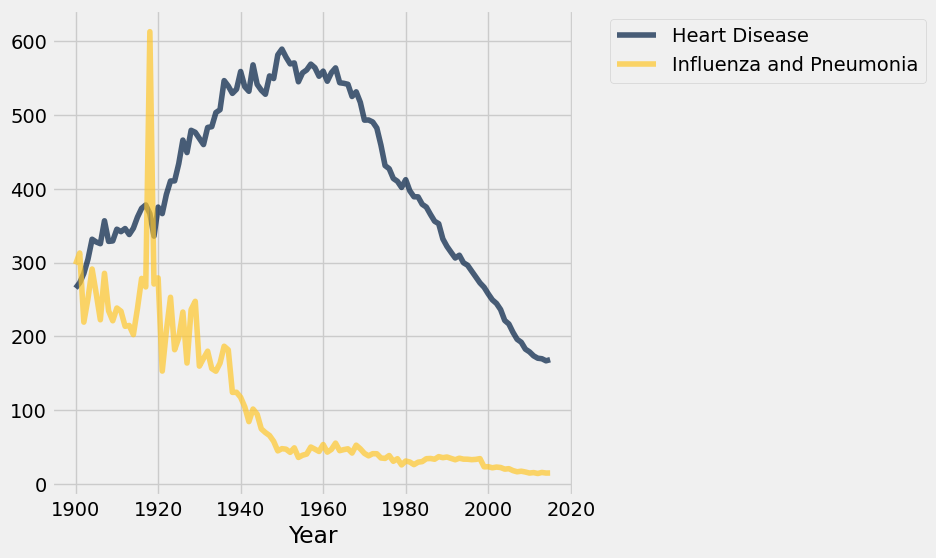

In [6]:
causes_for_plotting.select('Year', "Heart Disease", "Influenza and Pneumonia").plot('Year')

Beginning in 1900 and continuing until 1950, we observe that death rates for Influenza and Pneumonia decrease while death rates for Heart Disease increase. This phenomenon is known as the epidemiological transition: in developed countries, the severity of infectious disease has decreased, but chronic disease has become more widespread. Coronary heart disease (CHD) is one of the most deadly chronic diseases that has emerged in the past century, and more healthcare resources have been invested to studying it.

We would like to see what a plot of the data would have looked like had you been living in 1950. CHD was the leading cause of death and had killed millions of people without warning. It had become twice as lethal in just a few decades and people didn't understand why this was happening.

**Question 1.2: (1 pts)** Plot the data from 1900 to 1950 of all causes of death.  On the horizontal axis, you should have *Year*

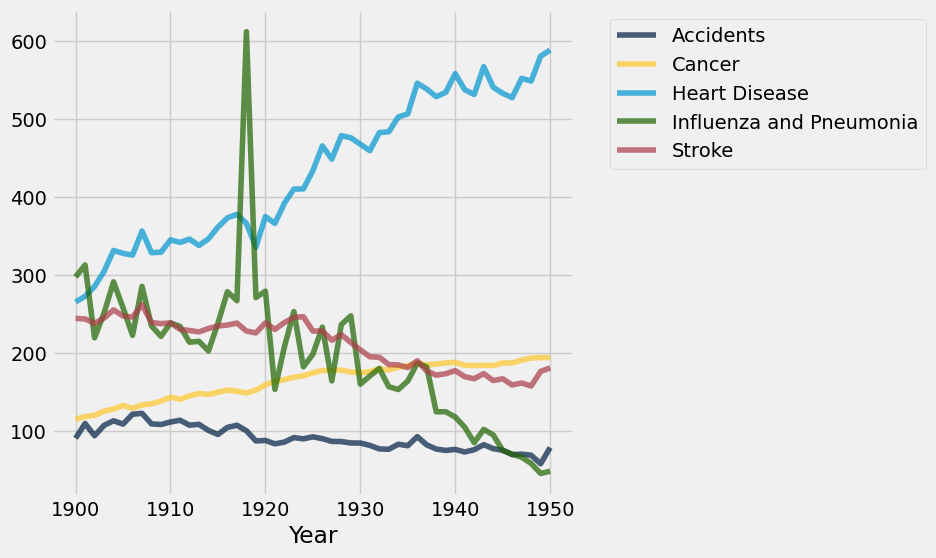

In [7]:
causes_for_plotting.where('Year', are.between_or_equal_to(1900, 1950)).plot('Year')

*Hint:* Your plot should look like:

<img src ="Q1.2_graph.PNG">

The view from 2016 looks a lot less scary, however, since we know it eventually went down. The decline in CHD deaths is one of the greatest public health triumphs of the last half century. That decline represents many millions of saved lives, and it was not inevitable. The Framingham Heart Study, in particular, was the first to discover the associations between heart disease and risk factors like smoking, high cholesterol, high blood pressure, obesity, and lack of exercise.

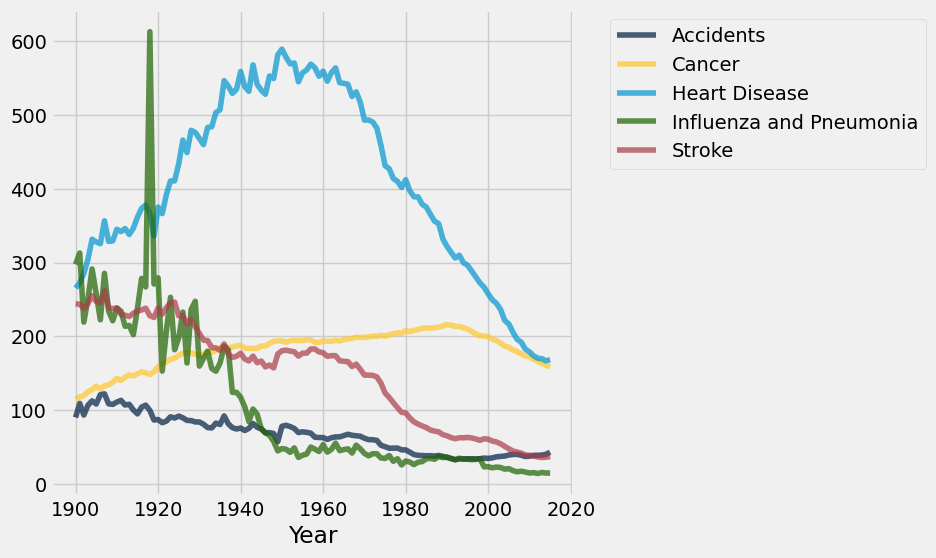

In [8]:
# Do not change this line
causes_for_plotting.plot('Year')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and diet on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease is still higher than the death rates of most other causes. Even though the death rate is starkly decreasing, there's still a lot we don't understand about the causes (both direct and indirect) of heart disease.

## Part 2: The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers from  Framingham, Massachusetts for several decades, and followup studies even looked at their descendants. In this part of the project, we'll investigate some of the study's key findings about cholesterol and heart disease.

Run the cell below to examine data for 3,842 subjects from the first wave of the study, collected in 1956.

In [9]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study; a value of 1 indicates that they **did** develop heart disease and a value of 0 indicates that they **did not** develop heart disease.

You may have noticed that the table contains fewer rows than subjects in the original study -- we are excluding subjects who already had heart disease or had missing data.

### Part 2, Section 1: Diabetes and the Population

Before we begin our investigation of cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the **prevalence of diagnosed diabetes (i.e., the proportion of the population who have it) in the U.S. around this time was 0.0093.** We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is *equivalent* to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is *different* from the prevalence of diagnosed diabetes within the population.

**Sanity Check!** What type of test are we running? Confirm your understanding with a peer!

We are going to use the absolute distance between the **observed prevalence** in the study and the **true population prevalence** as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 2.1.1: (3 pts)** What is the observed value of the test statistic in the data from the Framingham Study? Assign `observed_diabetes_distance` to this value. 

*Hint 1*: You should perform your calculations based on the 3,842 subjects in the `framingham` table, not the 5,000 original study participants.

*Hint 2:* Recall that prevalence is defined as the proportion of the population who have a disease.

In [10]:
true_population_prevalence = 0.0093
observed_diabetes_distance = (sum(framingham.column('DIABETES') > 0)/3842) - true_population_prevalence
observed_diabetes_distance 

0.018029515877147319

In [11]:
grader.check("q2_1_1")

q2_1_1 results: All test cases passed!

**Question 2.1.2: (3 pts)** Define the function `diabetes_test_statistic` which should return exactly one simulated statistic of the absolute distance between the observed prevalence and the true population prevalence under the null hypothesis. Make sure that your simulated sample is the same size as your original sample.

*Hint 1:* The array `diabetes_proportions` contains the proportions of the population without and with diabetes, respectively.

*Hint 2*: Recall that prevalence is defined as the proportion of the population who have a disease.

In [12]:
diabetes_proportions = make_array(.9907, .0093)

def diabetes_test_statistic():
    fs = framingham.sample()
    true_population_prevalence = 0.0093
    observed_dia_distance = (sum(fs.column('DIABETES') > 0)/3842) - true_population_prevalence
    return observed_dia_distance


In [13]:
grader.check("q2_1_2")

q2_1_2 results: All test cases passed!

**Question 2.1.3: (3 pts)**  Complete the following code to simulate 5,000 values of the statistic under the null hypothesis.

In [36]:
diabetes_simulated_stats = make_array()

for i in np.arange(5000): 
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, diabetes_test_statistic())
    

In [37]:
grader.check("q2_1_3")

q2_1_3 results: All test cases passed!

**Question 2.1.4: (1 pt)** Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

*If you're not sure if your histogram is correct, think about how we're generating the sample statistics under the null, and what those statistics will look like*

*Make sure to run the cell that draws the histogram, since it will be graded.*


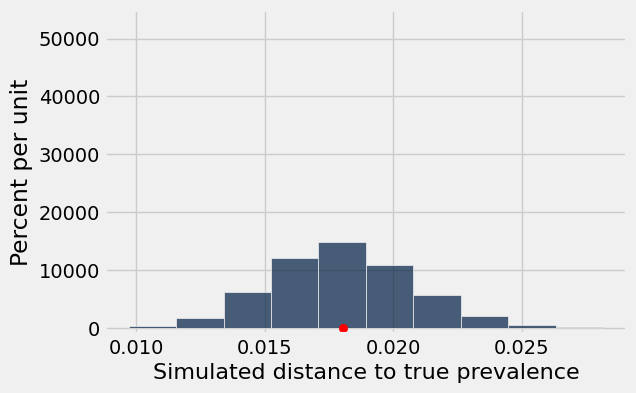

In [38]:
# Don't be alarmed if the value your red dot is on doesn't match with the numerical value
# of your observed_diabetes_distance. If you get a warning, you can ignore it. 
Table().with_column('Simulated distance to true prevalence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red')
plots.ylim(-10, 550);

**Question 2.1.5: (3 pts)** Based on *just* the histogram above, should you reject the null hypothesis? Explain your answer.

Yes, since it seems that on average most of the simulated values are a similar distance away from the actual population statistic

**Question 2.1.6: (2 pts)** Why might there be a difference between the population and the sample from the Framingham Study? Which of the following statements, *if true*, would explain the higher diabetes prevalence in the Framingham population?

Assign `framingham_explanations` to an array of integer(s) corresponding to the explanation(s), if true, that **are consistent** with the trends we observe in the data and our hypothesis test results. 

1. The Framingham participants were relatively wealthy, and thus ate a luxurious diet high in sugar. High-sugar diets are a known cause of diabetes.
2. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed). By contrast, the Framingham participants were less likely to go undiagnosed because they had regular medical examinations as part of the study.
3. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.

In [39]:
framingham_explanations = make_array(1, 2, 3)
framingham_explanations

array([1, 2, 3])

In [40]:
grader.check("q2_1_6")

q2_1_6 results: All test cases passed!

In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting more information from each person in the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Part 2, Section 2: Cholesterol and Heart Disease

In the remainder of this part, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the distribution of cholesterol levels among those who develop heart disease is the *same* as the distribution of cholesterol levels among those who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who develop heart disease are *higher*, on average, than the cholesterol level of people who do not.

**Question 2.2.1: (1 pt)** From the provided null and alternative hypotheses, does it seem reasonable to use A/B Testing to determine which model is more consistent with our data? Assign the variable `ab_reasonable` to `True` if it seems reasonable and `False` otherwise.

In [41]:
ab_reasonable = True
ab_reasonable

True

In [42]:
grader.check("q2_2_1")

q2_2_1 results: All test cases passed!

**Question 2.2.2: (2 pts)** Now that we have a null hypothesis, we need a test statistic. Which of the following options is the best choice for a test statistic? Assign `ab_test_stat` to an integer corresponding to the best option for our test statistic.

*Hint*: Remember that larger values of the test statistic should favor the alternative over the null.

1. The difference between the average cholesterol levels of those who get heart disease and those who don't
2. The difference between the average cholesterol levels of those who don't get heart disease and those who do
3. The absolute difference between the average cholesterol levels of those who get heart disease and those who don't
4. The absolute difference between the average cholesterol levels of those who don't get heart disease and those who do

In [43]:
ab_test_stat = 1

In [44]:
grader.check("q2_2_2")

q2_2_2 results: All test cases passed!

**Question 2.2.3: (3 pts)** Explain and justify your choice of the test statistic from Question 2.2.2 in three sentences or less.

Since the alternative hypothesis states that cholesterol levels of people who develop heart disease should be higher, we need to look at the difference by subtracting the average cholesterol levels of those who get heart disease from those who don't. The absolute difference is not necessary, because we need to know if the difference is positive or negative.

**Question 2.2.4: (4 pts)** Write a function that computes your test statistic. It should take a table that has the following two columns, `TOTCHOL` (total serum cholesterol) and `ANYCHD` (whether or not the person had coronary heart disease), and compute the test statistic you described above. Note that the table can have more than just the two columns listed above.

Use the function you defined to compute the observed test statistic, and assign it to the name `framingham_observed_statistic`.

In [45]:
def framingham_test_statistic(tbl):
    heart_disease = np.mean(tbl.where('ANYCHD', 1).column('TOTCHOL'))
    no_hd = np.mean(tbl.where('ANYCHD', 0).column('TOTCHOL'))
    return heart_disease - no_hd
framingham_observed_statistic = framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

In [46]:
grader.check("q2_2_4")

q2_2_4 results: All test cases passed!

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 500 times to understand the distribution under the null hypothesis.

**Question 2.2.5: (5 pts)** Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 500 times), create a new table based on the simulation, and return the value of the test statistic for that simulated sample.  

*Hint*: How many random samples should you collect?

*Hint*: Using `tbl.with_column(...)` with a column name that already exists in `tbl` will replace that column.


In [63]:
def simulate_framingham_null():
    newfram = framingham.sample(with_replacement = False)
    newfram = framingham.with_column('TOTCHOL', newfram.column('TOTCHOL'))
    return framingham_test_statistic(newfram)
                                       
# Run your function once to make sure that it works.
simulate_framingham_null()

-1.9761835281683204

In [64]:
grader.check("q2_2_5")

q2_2_5 results: All test cases passed!

**Question 2.2.6: (3 pts)** Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 500 values of the test statistic under the null hypothesis and store the result in the array `framingham_simulated_stats`.

*Hint*: You should use the `simulate_framingham_null()` function your wrote above.

**Warning:** Running this cell should take a few minutes at most. We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

In [65]:
# this code may take some time to run (a few minutes at most)
framingham_simulated_stats = make_array()

for i in np.arange(500):
    framingham_simulated_stats = np.append(framingham_simulated_stats, simulate_framingham_null())
    

In [66]:
grader.check("q2_2_6")

q2_2_6 results: All test cases passed!

**Question 2.2.7: (1 pt)** The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

(-0.02, 0.25)

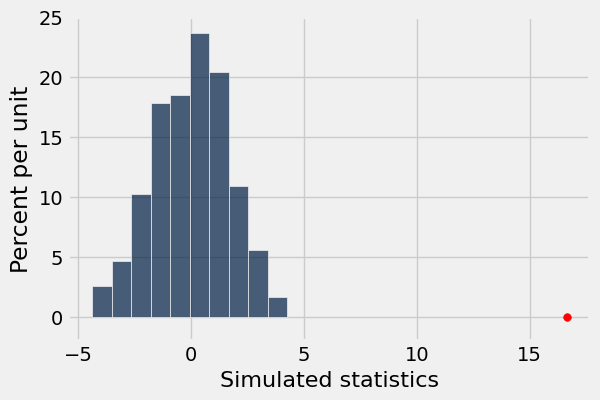

In [67]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.scatter(framingham_observed_statistic, 0, color='red', s=30)
plots.ylim(-0.02, 0.25)

**Question 2.2.8: (3 pts)** Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_val`.

*Hint*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.


In [73]:
framingham_p_val = sum(framingham_simulated_stats > framingham_observed_statistic)/500
framingham_p_val

0.0

In [72]:
grader.check("q2_2_8")

q2_2_8 results: All test cases passed!

**Question 2.2.9: (2 pts)** Despite the Framingham Heart Study's well-deserved reputation as a well-conducted and rigorous study, it has some major limitations. Give one specific reason why it can't be said that high cholesterol *causes* heart disease.

Correlation does not imply causation. There are many external factors that may be the true reason for the correlation.

<!-- END QUESTION -->



Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

> "Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [71]:
grader.check_all()

q1_1 results: All test cases passed!

q2_1_1 results: All test cases passed!

q2_1_2 results: All test cases passed!

q2_1_3 results: All test cases passed!

q2_1_6 results: All test cases passed!

q2_2_1 results: All test cases passed!

q2_2_2 results: All test cases passed!

q2_2_4 results: All test cases passed!

q2_2_5 results: All test cases passed!

q2_2_6 results: All test cases passed!

q2_2_8 results: All test cases passed!

### Congratulations!

**You are done with Parts 1 and 2 of Project 2!**  Please save, download, and submit your notebook to Gradescope.